In [ ]:
!pip install dnspython

     |████████████████████████████████| 241 kB 5.1 MB/s 


In [ ]:
from credentials import *
from mongodb_client import init_mongodb
from output import printProgressBar
import seaborn as sns

def get_documents(col, filter = {}):
  num_docs = col.count_documents(filter)
  cursor = col.find(filter)
  print('Copying cursor...')
  collection_data = []
  i = 0
  printProgressBar(i, num_docs, {}, prefix='Progress:', suffix='Complete', length=50, printEnd='')
  for doc in cursor:
    collection_data.append((doc['Number_of_Words'], doc['Number_of_Inits']))
    i += 1
    if i%100==0:
      printProgressBar(i, num_docs, {}, prefix='Progress:', suffix='Complete', length=50, printEnd='')
  printProgressBar(i, num_docs, {}, prefix='Progress:', suffix='Complete', length=50)
  print('Cursor copied')
  return collection_data

num_words = {}
num_inits = {}
for cluster in [ENRON0, ENRON1]:
  print(f'\nWorking with {cluster.split("@")[1]}')
  print('----------------------------------------------')
  client, _, col = init_mongodb(cluster)

  collection_data = get_documents(col)
  
  i = 0
  num_collection = len(collection_data)
  print('Starting process...')
  printProgressBar(i, num_collection, {}, prefix='Progress:', suffix='Complete', length=50, printEnd='')
  for words, inits in collection_data:
    if words not in num_words:
      num_words[words] = 0
    if inits not in num_inits:
      num_inits[inits] = 0
    num_words[words] += 1
    num_inits[inits] += 1
    i += 1
    if i%100==0:
      printProgressBar(i, num_collection, {}, prefix='Progress:', suffix='Complete', length=50, printEnd='')
  printProgressBar(i, num_collection, {}, prefix='Progress:', suffix='Complete', length=50)
  client.close()



Working with enron0.oaiur.mongodb.net/EnronDB
----------------------------------------------
Copying cursor...
Progress: |██████████████████████████████████████████████████| 100.00% Complete (242164/242164)
Cursor copied
Starting process...
Progress: |██████████████████████████████████████████████████| 100.00% Complete (242164/242164)

Working with enron1.mymux.mongodb.net/EnronDB
----------------------------------------------
Copying cursor...
Progress: |██████████████████████████████████████████████████| 100.00% Complete (118952/118952)
Cursor copied
Starting process...
Progress: |██████████████████████████████████████████████████| 100.00% Complete (118952/118952)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de mensajes')

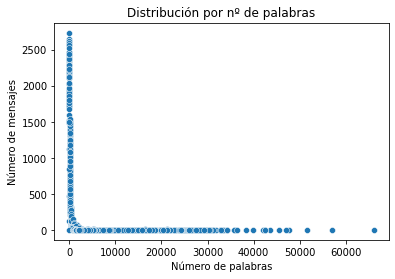

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(num_words.keys(), num_words.values())
plt.title('Distribución por nº de palabras')
# Set x-axis label
plt.xlabel('Número de palabras')
# Set y-axis label
plt.ylabel('Número de mensajes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de mensajes')

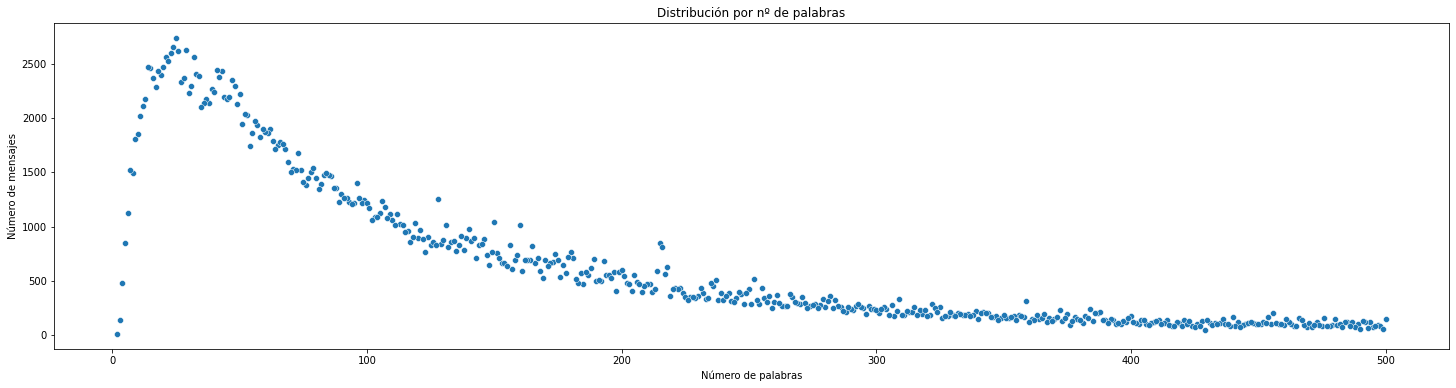

In [ ]:
mini_msg = {k: v for k, v in num_words.items() if k <= 500}
fig, ax = plt.subplots(figsize=(25, 6))
sns.scatterplot(mini_msg.keys(), mini_msg.values(), ax = ax)
plt.title('Distribución por nº de palabras')
# Set x-axis label
plt.xlabel('Número de palabras')
# Set y-axis label
plt.ylabel('Número de mensajes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de mensajes')

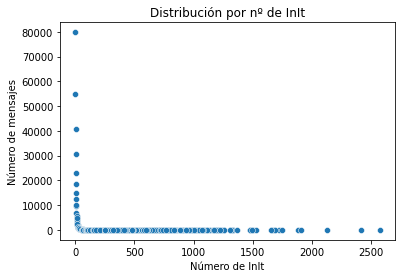

In [ ]:
sns.scatterplot(num_inits.keys(), num_inits.values())
plt.title('Distribución por nº de InIt')
# Set x-axis label
plt.xlabel('Número de InIt')
# Set y-axis label
plt.ylabel('Número de mensajes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de mensajes')

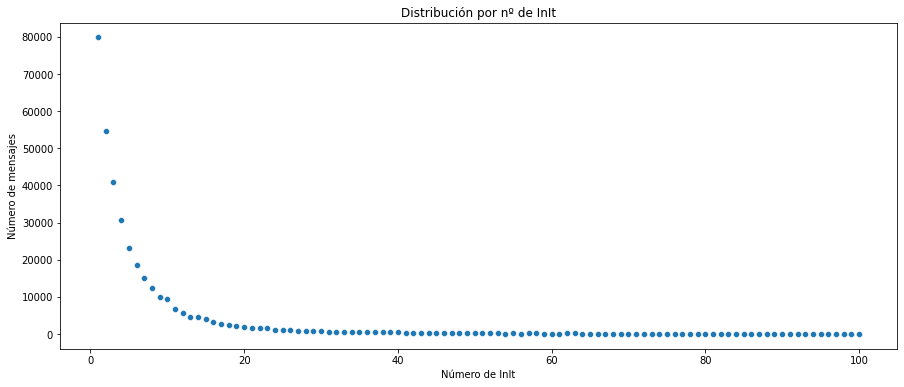

In [ ]:
mini_inits = {k: v for k, v in num_inits.items() if k <= 100}
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(mini_inits.keys(), mini_inits.values(), ax = ax)
plt.title('Distribución por nº de InIt')
# Set x-axis label
plt.xlabel('Número de InIt')
# Set y-axis label
plt.ylabel('Número de mensajes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Porcentage de mensajes acumulado')

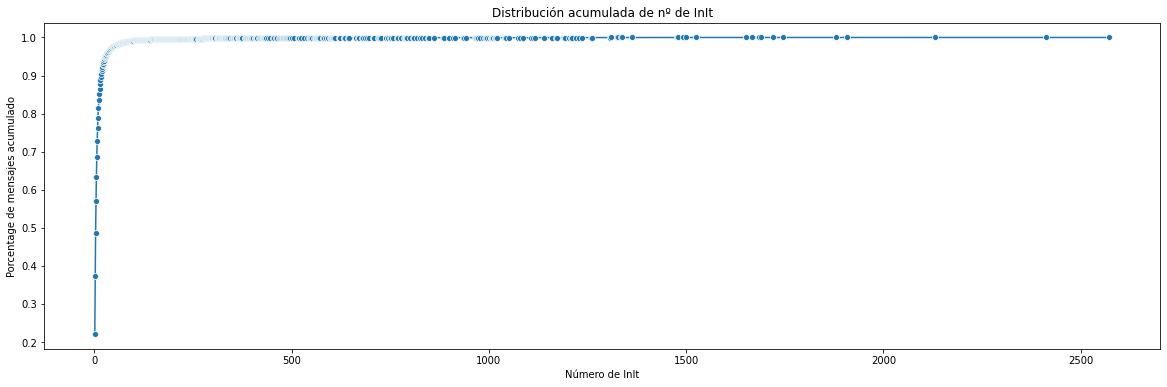

In [ ]:
total_messages = sum([v for _, v in num_inits.items()])
percentage_inits = {}
acum_inits = {}
acum = 0
for k, v in sorted(num_inits.items()):
  acum += v
  percentage_inits[k] = acum/total_messages
  acum_inits[k] = acum

fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(percentage_inits.keys(), percentage_inits.values(), ax = ax, marker='o')
plt.title('Distribución acumulada de nº de InIt')
# Set x-axis label
plt.xlabel('Número de InIt')
# Set y-axis label
plt.ylabel('Porcentage de mensajes acumulado')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Porcentage de mensajes acumulado')

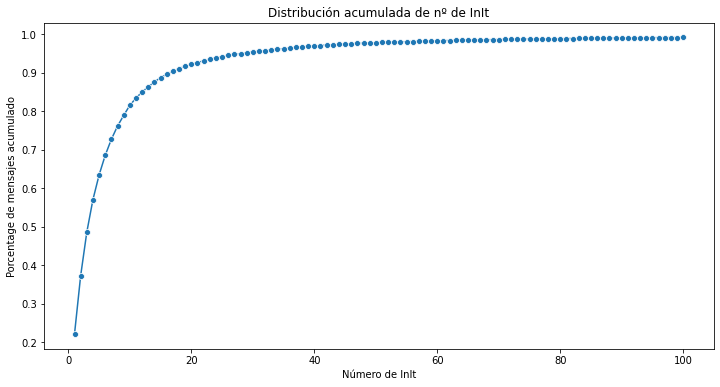

In [ ]:
mini_porc = {k: v for k, v in percentage_inits.items() if k <= 100}
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(mini_porc.keys(), mini_porc.values(), ax = ax, marker = 'o')
plt.title('Distribución acumulada de nº de InIt')
# Set x-axis label
plt.xlabel('Número de InIt')
# Set y-axis label
plt.ylabel('Porcentage de mensajes acumulado')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de mensajes acumulado')

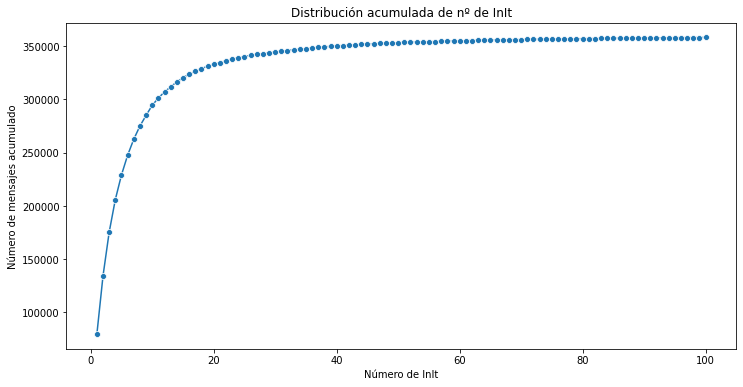

In [ ]:
mini_acum = {k: v for k, v in acum_inits.items() if k <= 100}
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(mini_acum.keys(), mini_acum.values(), ax = ax, marker='o')
plt.title('Distribución acumulada de nº de InIt')
# Set x-axis label
plt.xlabel('Número de InIt')
# Set y-axis label
plt.ylabel('Número de mensajes acumulado')

In [ ]:
mini_porc

{1: 0.22107023781831878,
 2: 0.3725921864442451,
 3: 0.4859657284639839,
 4: 0.5706836584366243,
 5: 0.6346132544667088,
 6: 0.6858488685076264,
 7: 0.7275252273507682,
 8: 0.761724764341652,
 9: 0.7894443890605789,
 10: 0.8157295716611837,
 11: 0.8344936253170726,
 12: 0.8505687922994273,
 13: 0.8636670765072719,
 14: 0.8765881323452852,
 15: 0.8874987538630246,
 16: 0.8967672437665459,
 17: 0.9042025277196247,
 18: 0.9112113559077969,
 19: 0.9169878930869859,
 20: 0.922296436602089,
 21: 0.9265997629570554,
 22: 0.9314735431274161,
 23: 0.9359264059194276,
 24: 0.9391746696352419,
 25: 0.9423675494854838,
 26: 0.9454219696717953,
 27: 0.9478117834712392,
 28: 0.9500631376067524,
 29: 0.9522784922296437,
 30: 0.9542390810709024,
 31: 0.9561138249205241,
 32: 0.9580051839298176,
 33: 0.9598079287541953,
 34: 0.9615386745533291,
 35: 0.9630340389237807,
 36: 0.9644158663698091,
 37: 0.9661909192614008,
 38: 0.9673816723712049,
 39: 0.9688050377164125,
 40: 0.9700567130783461,
 41: 0.971

In [ ]:
mini_acum

{1: 79832,
 2: 134549,
 3: 175490,
 4: 206083,
 5: 229169,
 6: 247671,
 7: 262721,
 8: 275071,
 9: 285081,
 10: 294573,
 11: 301349,
 12: 307154,
 13: 311884,
 14: 316550,
 15: 320490,
 16: 323837,
 17: 326522,
 18: 329053,
 19: 331139,
 20: 333056,
 21: 334610,
 22: 336370,
 23: 337978,
 24: 339151,
 25: 340304,
 26: 341407,
 27: 342270,
 28: 343083,
 29: 343883,
 30: 344591,
 31: 345268,
 32: 345951,
 33: 346602,
 34: 347227,
 35: 347767,
 36: 348266,
 37: 348907,
 38: 349337,
 39: 349851,
 40: 350303,
 41: 350686,
 42: 351045,
 43: 351361,
 44: 351657,
 45: 352059,
 46: 352324,
 47: 352603,
 48: 352861,
 49: 353116,
 50: 353366,
 51: 353571,
 52: 353800,
 53: 353990,
 54: 354122,
 55: 354280,
 56: 354429,
 57: 354643,
 58: 354835,
 59: 354949,
 60: 355059,
 61: 355204,
 62: 355360,
 63: 355563,
 64: 355661,
 65: 355773,
 66: 355875,
 67: 355975,
 68: 356094,
 69: 356193,
 70: 356300,
 71: 356374,
 72: 356474,
 73: 356545,
 74: 356675,
 75: 356752,
 76: 356813,
 77: 356881,
 78: 3569